<h1 align=center> <font size =5> Proyecto de Invetarios </font></h1>
<img src="https://www.cedesistemas.edu.co/sitio/wp-content/themes/andreco/images/logo.png" width=300, align ="right"> 

* **Cedesistemas**
* **Gerencia Comercial**
* **Area Analítica**
* **Responsabes :** Oscar Gaspar, Analista;

**Medellin -Octubre 2020**

<a id="ref7"></a>
## Tabla de Contenido

* <p><a href ="#ref1" > 1) Descripcion del Problema </a></p>
* <p><a href ="#ref2" > 2) Descripcion de Datos </a></p>
* <p><a href ="#ref3" > 3) Análisis Exploratorio y Descriptivo de los Datos</a></p>
* <p><a href ="#ref4" > 4) Modelación </a></p>
* <p><a href ="#ref5" > 5) Evalucion </a></p>
* <p><a href ="#ref6" > 6) Conclusión y Recomendaciones </a></p>

<a id="ref1"></a>
## 1) **Descripcion del Problema**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Contexto**

Se adjunta un conjunto de productos en el que estamos tratando de determinar qué productos debemos seguir vendiendo y qué productos eliminar de nuestro inventario. El archivo contiene TANTO datos históricos de ventas como inventario activo, que se pueden distinguir con la columna titulada "Tipo de archivo".

Sospechamos que la ciencia de datos aplicada al conjunto, como un análisis de árbol de decisión o una regresión logística, o algún otro modelo de aprendizaje automático, puede ayudarnos a generar un valor (es decir, puntaje de probabilidad) para cada producto, que se puede usar como principal determinante de la evaluación del inventario. Cada fila del archivo representa un producto.

Es importante notar que tenemos MUCHOS productos en nuestro inventario, y muy pocos de ellos tienden a venderse (solo alrededor del 10% se vende cada año) y muchos de los productos solo tienen una venta única en el transcurso de un año.

<a id="ref2"></a>
## 2) **Descripcion de Datos**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Cargamos Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro # Vavariables Numericas probar Normalidad
from scipy.stats import chi2_contingency # Varianbles Categoricas y probar independencia

import statsmodels.stats.api as sms


In [2]:
#conda install statsmodels 

**Cargar Datos**

In [3]:
df = pd.read_csv(r"D:\Usuarios\OSCAGAAl\Documents\Diplomado_ML_2020\Insumos\SalesKaggle3.csv")

In [4]:
print(df.head(5))

   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  
1         39          0.00

**Diccionario**

El archivo contiene datos históricos de ventas (identificados con la columna titulada File_Type) junto con el inventario activo actual que necesita evaluación (es decir, Tipo de archivo = "Activo"). Los datos históricos muestran las ventas de los últimos 6 meses. El objetivo binario (1 = venta, 0 = sin venta en los últimos seis meses) es probablemente el objetivo principal que debería impulsar el análisis.

Las otras columnas contienen atributos numéricos y categóricos que consideramos relevantes para las ventas.

Tenga en cuenta que algunos de los SKU de ventas históricos TAMBIÉN se incluyen en el inventario activo.

Algunos comentarios sobre los atributos incluidos, ya que nos damos cuenta de que podemos tener algunos atributos que son innecesarios o que es posible que deban explicarse.

* SKU_number: este es el identificador único para cada producto.

* Orden: solo un contador secuencial. Puede ignorarse.

* SoldFlag: 1 = vendido en los últimos 6 meses. 0 = No vendido

* MarketingType = Dos categorías de cómo comercializamos el producto. Esto probablemente debería ignorarse, o mejor aún, cada tipo debería considerarse de forma independiente.

* Bandera de nueva versión = cualquier producto que haya tenido una versión futura (es decir, número de versión> 1)

<a id="ref3"></a>
## 3) **Análisis Exploratorio y Descriptivo de los Datos**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>

**Revision de Nas**

In [5]:
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

**Tabla Cruzada**

In [6]:
df_hist=df[df["File_Type"]=="Historical"] # Historia para entrenar el modelo 
df_hist.isnull().sum()

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64

In [7]:
df_act=df[df["File_Type"]=="Active"] # Estaba es para Aplicar el Modelo
df_act.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

**Dimmension Base**

In [8]:
df_hist.shape

(75996, 14)

**Revision de Variables**

In [9]:
print(df_hist.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  float64
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  float64
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB
None


In [10]:
df_hist.head(2)
## Se Recomienda que las ID sean String

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54


**Recodificar Variables**

In [11]:
df_hist["Order"]=df_hist["Order"].astype(str) # Tranformar de Numerica a String
df_hist["SKU_number"]=df_hist["SKU_number"].astype(str) # Tranformar de Numerica a String

<ipython-input-11-e5f3717b591f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist["Order"]=df_hist["Order"].astype(str) # Tranformar de Numerica a String
<ipython-input-11-e5f3717b591f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist["SKU_number"]=df_hist["SKU_number"].astype(str) # Tranformar de Numerica a String


**Recodicar en dos pasos Soldflag**

In [12]:
df_hist["SoldFlag"]=df_hist["SoldFlag"].astype(int) # Tranformar de decimal a entero
df_hist["SoldFlag"]=df_hist["SoldFlag"].astype('category') # Tranformar de decimal a entero

df_hist["MarketingType"]=df_hist["MarketingType"].astype('category') 

print(df_hist.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order             75996 non-null  object  
 1   File_Type         75996 non-null  object  
 2   SKU_number        75996 non-null  object  
 3   SoldFlag          75996 non-null  category
 4   SoldCount         75996 non-null  float64 
 5   MarketingType     75996 non-null  category
 6   ReleaseNumber     75996 non-null  int64   
 7   New_Release_Flag  75996 non-null  int64   
 8   StrengthFactor    75996 non-null  float64 
 9   PriceReg          75996 non-null  float64 
 10  ReleaseYear       75996 non-null  int64   
 11  ItemCount         75996 non-null  int64   
 12  LowUserPrice      75996 non-null  float64 
 13  LowNetPrice       75996 non-null  float64 
dtypes: category(2), float64(5), int64(4), object(3)
memory usage: 7.7+ MB
None


<ipython-input-12-4a4f744392bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist["SoldFlag"]=df_hist["SoldFlag"].astype(int) # Tranformar de decimal a entero
<ipython-input-12-4a4f744392bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist["SoldFlag"]=df_hist["SoldFlag"].astype('category') # Tranformar de decimal a entero
<ipython-input-12-4a4f744392bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

**Analisis de Variables categoricas**

In [13]:
pd.value_counts(df_hist["SoldFlag"])

0    63000
1    12996
Name: SoldFlag, dtype: int64

In [14]:
pd.value_counts(df_hist["SoldFlag"])/len(df_hist.index)

0    0.828991
1    0.171009
Name: SoldFlag, dtype: float64

In [15]:
(pd.value_counts(df_hist["SoldFlag"])/len(df_hist.index))*100

0    82.8991
1    17.1009
Name: SoldFlag, dtype: float64

**Grafico de Tortas variable Tipo de Venta**

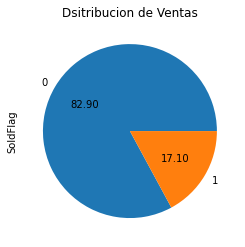

In [16]:
plot = df_hist["SoldFlag"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion de Ventas")

**Graica por Tipo de Mercadeo**

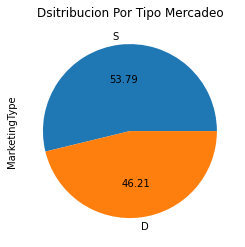

In [17]:
plot = df_hist["MarketingType"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion Por Tipo Mercadeo")

**Tablas Cruzadas**

In [18]:
pd.crosstab(df_hist["SoldFlag"],df_hist["MarketingType"])

MarketingType,D,S
SoldFlag,,
0,25965,37035
1,9154,3842


In [19]:
# con total
pd.crosstab(df_hist["SoldFlag"],df_hist["MarketingType"],margins=True)

MarketingType,D,S,All
SoldFlag,,,
0,25965,37035,63000
1,9154,3842,12996
All,35119,40877,75996


In [20]:
## Terminos Porcentajes
pd.crosstab(index=df_hist["SoldFlag"],columns=df_hist["MarketingType"],margins=True).apply(lambda r:r/len(df_hist)*100,axis=1)


MarketingType,D,S,All
SoldFlag,,,
0,34.166272,48.732828,82.8991
1,12.045371,5.055529,17.1009
All,46.211643,53.788357,100.0000


**Prueba de Hipotesis para Variables categoricas- Test Estadisco de Independencia**

* H0= Las Variables MarketingType y SoldFlag son Independientes
* Ha= Las Variables MarketingType y SoldFlag son Dependientes

* Si P valor Estadistico de la Prueba <= 0.05; Rechazo H0 las variables son Dependientes
* Si P valor Estadistico de la Prueba > 0.05; Rechazo Ha; las variables son independientes



**Test chi 2**

In [21]:
tc=pd.crosstab(index=df_hist["SoldFlag"],columns=df_hist["MarketingType"])

In [22]:
c,p,pchi, test=chi2_contingency(tc)
p

0.0

In [23]:
if(p <= 0.05):
    print("Rechazo H0 las variables son Dependientes")
else:
    print("Rechazo Ha; las variables son independientes")

Rechazo H0 las variables son Dependientes


La variable tipo de mercadeo influye o esta relacionada con el tipo de venta del producto en los ultimos 6 meses

**Analisis De Variables Numericas**

In [24]:
df_hist.head(3)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97


In [25]:
df_hist["ReleaseNumber"]

0        15
1         7
2         0
3         4
4         2
         ..
75991     2
75992     6
75993     7
75994     2
75995     2
Name: ReleaseNumber, Length: 75996, dtype: int64

**Histograma de Numero de Lanzamientos del Producto**

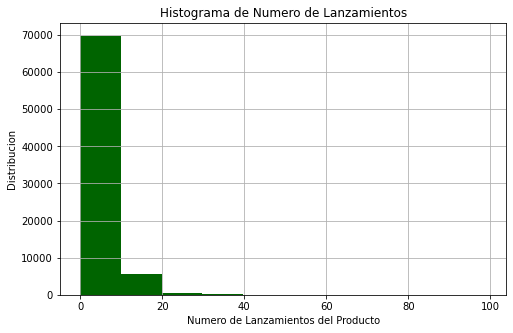

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df_hist["ReleaseNumber"],facecolor="darkgreen")
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Promedio**

In [27]:
Promedio_Inicial=df_hist["ReleaseNumber"].mean()
print(Promedio_Inicial)

4.152534343912838


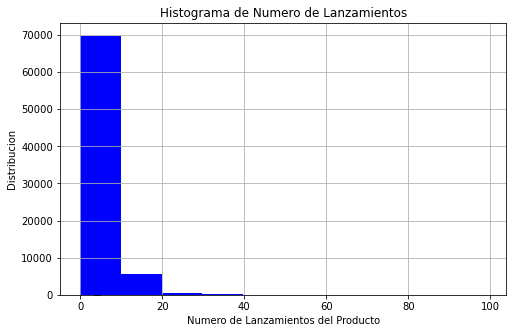

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df_hist["ReleaseNumber"],facecolor="blue")
plt.scatter(Promedio_Inicial,0,color="green",s=30)
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Identificar Valores Atipicos**

**Boxplot**

Para dibujar el diagrama de caja necesitas conocer los valores de posición, llamados cuartiles 1 ,2 y 3. La longitud de la caja es el rango intercuartílico (q3-q1). Y la longitud de los «palos» (las líneas que salen de la caja) son los valores extremos. También necesitas saber cúales son los valores «raros» o outliers. Los dibujarás con un puntito o una crucecita.

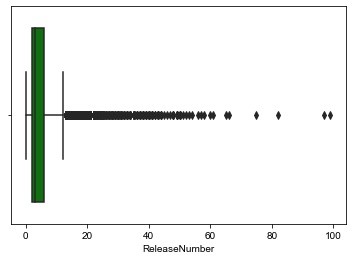

In [29]:
sns.boxplot(x=df_hist["ReleaseNumber"],color="green")
sns.set_theme(style="whitegrid")

In [30]:
#df_hist.boxplot(column="ReleaseNumber")

**Grafica de Puntos**

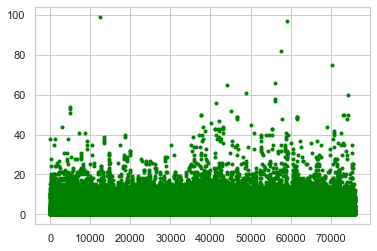

In [31]:
plt.plot(df_hist["ReleaseNumber"],".",color="green")

**Metodo IQR para encontrar Datos Atipicos**

In [32]:
q1,q3=np.percentile(df_hist["ReleaseNumber"],[25,75])
print(q1,q3)

2.0 6.0


In [33]:
IQR=q3-q1
print(IQR)

4.0


**Limites**

In [34]:
limite_Superior=q3+(1.5*IQR)
print(limite_Superior)

12.0


In [35]:
limite_Inferior=q1-(1.5*IQR)
print(limite_Inferior)

-4.0


**Grafica de Puntos con Aticos**

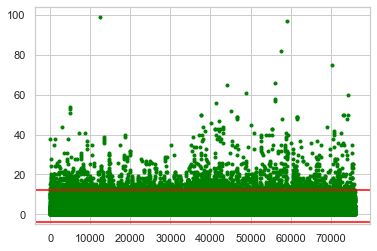

In [36]:
plt.plot(df_hist["ReleaseNumber"],".",color="green")
plt.axhline(y=limite_Superior,color="red",linestyle="-")
plt.axhline(y=limite_Inferior,color="red",linestyle="-")

**Filtramos los datos sin Valores Atipicos**

In [37]:
sin_atipicos=df_hist[(df_hist["ReleaseNumber"]>limite_Inferior) & (df_hist["ReleaseNumber"]<limite_Superior)]

**Graficar Boxplot**

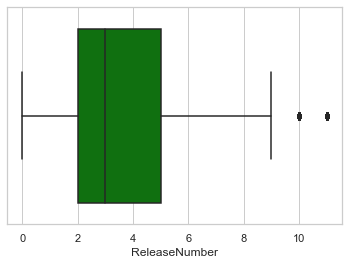

In [38]:
sns.boxplot(x=sin_atipicos["ReleaseNumber"],color="green")
sns.set_theme(style="whitegrid")

**Histograma**

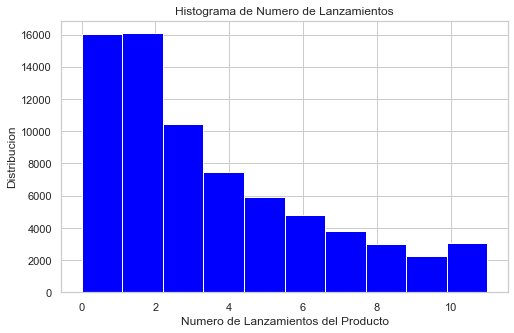

In [39]:
plt.figure(figsize=(8,5))
plt.hist(sin_atipicos["ReleaseNumber"],facecolor="blue")
plt.scatter(Promedio_Inicial,0,color="green",s=30)
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Grafica de Puntos sin Atipicos**

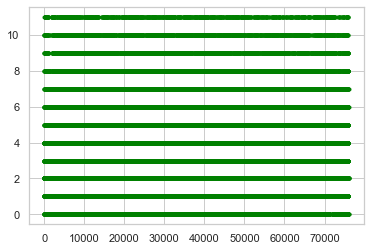

In [40]:
plt.plot(sin_atipicos["ReleaseNumber"],".",color="green")

**Promedio sin Atipicos**

In [51]:
Promedio_Sin_atipicos=sin_atipicos["ReleaseNumber"].mean()
Mediana_Sin_atipicos=sin_atipicos["ReleaseNumber"].median()

print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Mediana_Sin_atipicos)

4.152534343912838
3.6228299088012306
3.0


**Test de Normalidad para variable Numero de lanzamientos**

**Test Visual**

In [42]:
from statsmodels.graphics.gofplots import qqplot

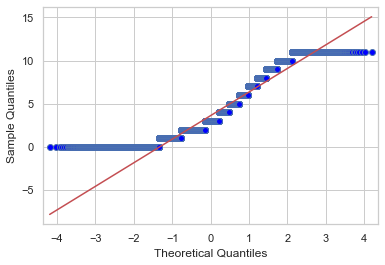

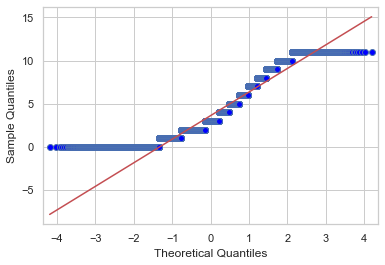

In [43]:
## qqplot
qqplot(sin_atipicos["ReleaseNumber"],line="s")

En estadística, un gráfico de Q-Q (quantile-quantile) es un gráfico de probabilidad, que es un método gráfico para comparar dos distribuciones de probabilidad al trazar sus cuantiles uno contra el otro.En este caso, lo ideal es que los puntos se acerquen a una recta diagonal.

**Prueba Estadistica de Normalidad**

In [44]:
from scipy.stats import shapiro

* H0= La distribuccion del numero de lanzamientos del producto es normal

* Ha= La distribuccion del numero de lanzamientos del producto no es normal

* Alfa = 0.05

* Si P valor < alfa(0.05), se rechaza normalidad, si p > alfa, se Acepta Normalidad

In [45]:
stat,p=shapiro(sin_atipicos["ReleaseNumber"])
print(p)

0.0


D:\Usuarios\OSCAGAAl\Anaconda3\envs\Diplomado_ML_2020\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
if(p <= 0.05):
    print("Se rechaza normalidad,")
else:
    print("Se Acepta Normalidad")

Se rechaza normalidad,


**Pruba de Hipotesis de Promedio o Media**

* H0= El promedio de numero de lanzamientos = 3.6

* Ha= El promedio de numero de lanzamientos  difernte de 3.6

* Alfa = 0.05

* Si P valor < alfa(0.05), se rechaza H0, si p > alfa, se Acepta Ha

In [47]:
from scipy.stats import ttest_1samp
print(Promedio_Sin_atipicos)

3.6228299088012306


In [48]:
tset,pvalor=ttest_1samp(df_hist["ReleaseNumber"],Promedio_Sin_atipicos)

In [49]:
pvalor

2.0656886202275976e-296

In [50]:
if(pvalor <= 0.05):
    print("Se rechaza que el promedio real es 3.6,")
else:
    print("Se Acepta que el promedio real es 3.6")

Se rechaza que el promedio real es 3.6,


**Aproxmacion al Promedio**

**REMUESTREO POR BOOTSTRAP**

In [53]:
from random import sample
import math

In [56]:
print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Mediana_Sin_atipicos)
df_hist.shape

4.152534343912838
3.6228299088012306
3.0


(75996, 14)

**Selecionamos la Muestra Aleatoria**

In [58]:
Muestra=df_hist.sample(n=1000,replace=False)
Muestra.shape

(1000, 14)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


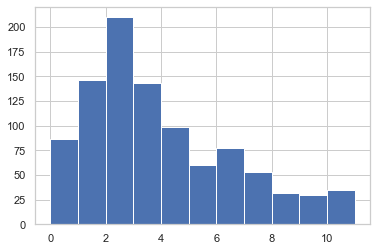

In [66]:
bins=np.arange(0,12,1)
print(bins)
n,bins,grafico_histograma=plt.hist(Muestra["ReleaseNumber"],bins)

In [70]:
Promedio_Muestra=Muestra["ReleaseNumber"].mean()
print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Promedio_Muestra)

4.152534343912838
3.6228299088012306
3.861


**Remuestreo**